**Denise Dodd: Classifying Images (Convolutional Neural Network (CNN))**

**In this exercise, I will build a convolutional neural network (CNN) to classify handwritten digits from the MNIST dataset.**

In [1]:
# Import needed modules.
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras import layers
from keras import models
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix

**1) Load the MNIST data set.**

In [2]:
# Sec 20.15.
# Load data and target from MNIST data
(data_train, target_train), (data_test, target_test) = mnist.load_data()
# (data_train, target_train), (data_test, target_test) = mnist.load_data()

**2) Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.**

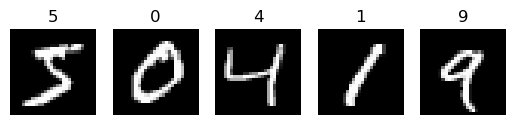

In [3]:
# Sec 8.1.
# Use for loop to iterate over the first five images in the training set.
# Preplot with 1 row and 5 cols.  Specify which image is being plotted with iamge+1.
# Determine which image to show.  Print image in gray scale.
# Use title to print the actual number which the images represent.
# Turn off grids, ticks, and axis usually used in plots for ease of viewing.
# Once the loop is complete, display image.
for image in range(5):
    plt.subplot(1, 5, image + 1)
    plt.imshow(data_train[image], cmap="gray")
    plt.title(str(target_train[image]))
    plt.axis('off')
plt.show()

**3) Build and train a Keras CNN classifier on the MNIST training set.**

In [4]:
# Chap 20.
# Start neural network.
model = models.Sequential()

# Add 2-dimensional convolutional layer with a ReLU activation function.
# Set the number of kernals at 64 to indicate 64 grids used on data to detect features.
# Set size of kernals at  3X3.
# Set image shape to represnet grayscale images.
model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add 2-dimensional MaxPooling layer for feature extraction.
# Set pool size of 2x2.
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten to a 1 dimensional layer compatable with dense layer.
model.add(layers.Flatten())
# Add fully connected layer with a ReLU activation function
model.add(layers.Dense(units = 64, activation='relu'))
# Add fully connected layer with a softmax activation function to assign probabilities.
model.add(layers.Dense(units = 10, activation='softmax'))

# Compile model.
# Use categorical_crossentrophy to minimize loss.
# Use root mean square propagation to optimize performance.
# Use accuracy as the metric to evalute model.
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Reshape training images and indicate gray scale.
# Convert pixel data type to float and rescale to between 0 and 1.
data_train = data_train.reshape(60000, 28, 28, 1)
data_train = data_train.astype('float32') / 255

# Reshape testing images and indicate gray scale.
# Convert pixel data type to float and rescale to between 0 and 1.
data_test = data_test.reshape(10000, 28, 28, 1)
data_test = data_test.astype('float32') / 255

# One-hot encode labels.
target_train = to_categorical(target_train)
target_test = to_categorical(target_test)

# Fit the model with training data.
# Pass data trough model 5 times (this takes awhile!)
# Batch 128 samples at a time (used a large batch size to save on time.)
model.fit(data_train, target_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 90s 188ms/step - loss: 0.2410 - accuracy: 0.9279
Epoch 2/5
469/469 [==============================] - 84s 180ms/step - loss: 0.0710 - accuracy: 0.9786
Epoch 3/5
469/469 [==============================] - 94s 200ms/step - loss: 0.0475 - accuracy: 0.9857
Epoch 4/5
469/469 [==============================] - 95s 202ms/step - loss: 0.0364 - accuracy: 0.9893
Epoch 5/5
469/469 [==============================] - 94s 200ms/step - loss: 0.0271 - accuracy: 0.9916


**4) Report the test accuracy of your model.**

In [5]:
# Calculate the loss and accuracy of test data.
test_loss, test_acc = model.evaluate(data_test, target_test)

# Print test accuracy rounded to 2 decimals.
print('Test accuracy:', round(test_acc,2))

313/313 [==============================] - 6s 19ms/step - loss: 0.0475 - accuracy: 0.9848
Test accuracy: 0.98


**5) Display a confusion matrix on the test set classifications.**

In [6]:
# Use model to find predicted probabilities of test images.
# Store the highest probabilities in numpy arrays.
test_pred = model.predict(data_test)
test_pred_labels = np.argmax(test_pred, axis=1)
test_target_test = np.argmax(target_test, axis=1)
print(confusion_matrix(test_target_test, test_pred_labels))

313/313 [==============================] - 6s 19ms/step
[[ 976    0    1    0    0    2    0    1    0    0]
 [   0 1128    3    1    0    0    2    0    1    0]
 [   2    2 1013    2    3    1    2    5    2    0]
 [   0    0    0 1001    0    3    0    4    2    0]
 [   0    0    0    0  981    0    0    0    0    1]
 [   1    0    0    8    0  881    2    0    0    0]
 [   7    2    0    1    1    2  944    1    0    0]
 [   1    1   10    1    1    0    0 1013    1    0]
 [   6    0    5    3    2    4    1    4  944    5]
 [   1    3    0    3   15    5    0   10    5  967]]


**6) Summarize results.**

Overall, the model has an accuracy of 98%.  I likly could have improved this accuracy by raising the epoch value when I fitted the model but I choose a lower value for the sake of time.  I also could have lowered the batch size to increase accuracy but I was comfortable with the accuracy value of 98% for the purposes of the exercise.

The confusion matrix furthur explains the accuracy value by detailing performance on each class.  The diagonal numbers represent correct classifications.  The low values outside of the middle diagonal repesenting misclassifications show that most predicitions were classified correct.

With the results shown by the accuracy percentage and confusion matrix, I would be comfortable using the model to interpret handwirtten numbers in the MNIST dataset.